<h1>Manchester Neighbourhoods - Make Recommendation on New Restaurant

<h4> Our client is a Venture Capitalist who wants to invest in the catering industry in the United Kingdom (UK). The client wants to open a restaurant in the Manchester area of England, UK. <br/><br/>

The client is looking to open restaurant in a popular “foodie” area of Manchester where there is already a significant presence of restaurants. <br/><br/>

The client has made the following requests <br/>

•	Use the Greater Manchester area of Britain will be target area for analysis <br/>
    

•	Provide a recommendation on Type of restaurant (i.e., cuisine served) <br/>
    

•	Provide a recommendation on the Area of Manchester where restaurant should be opened<br/>
    
</h4>


<h4> Methodology
    
    1. Scrape Postal Code Area Data from Wikipedia
    
    2. Get Longitide , Latitude Data from Google Maps
    
    3. Use Foursquare to find restaurants in Manchester
    
    4. Use data analysis and Clustering to identify restaurant type and best area

<h3 >Section 1 - Web Scrape from Wikipedia

In [251]:
import numpy as np # library for vectorized computation
import pandas as pd # library to process data as dataframes

In [252]:
import requests

In [253]:
from bs4 import BeautifulSoup

In [254]:
URL = 'https://en.wikipedia.org/wiki/M_postcode_area'      # define wikipedia URL
page = requests.get(URL)    

In [255]:
soup = BeautifulSoup(page.content, 'html.parser')             # Beautiful Soup to pull HTML into Python

In [257]:
man_hoods = soup.find_all('table')[1]                   #  Isolate table data from HTML page

In [259]:
pc_list = []                        

for child in man_hoods.children:               #  Read address table information line by line into pc_list 
    
        row=[]
   
        for td in child:
            try:
                row.append(td.text.replace('\n', '\n'))            #  Decided to leave /n as is and remove later 
            except:
                continue
            
        if len(row) > 0:
            pc_list.append(row)
        
        


In [261]:
len(pc_list[0])


53

In [262]:
rws=[]

print("list length =",len(pc_list[0]))            
i=0


for i in range (0, len(pc_list[0])):         #  Iterate through pc_list 
    
    line = pc_list[0][i].split("\n")         #  Break out elements by recognising new lines \n
    

    for x in line :                          #  Remove unwanted blanks
            if x=='' :
                line.remove(x)
            
    rws.append(line)
    i=i+1
    
rws                                          #  Check list 




list length = 53


[['Postcode district', 'Post town', 'Coverage', 'Local authority area(s)'],
 ['M1', 'MANCHESTER', 'Piccadilly, City Centre, Market Street', 'Manchester'],
 ['M2', 'MANCHESTER', 'Deansgate, City Centre', 'Manchester'],
 ['M3(Sectors 1, 2, 3, 4 and 9)',
  'MANCHESTER',
  'City Centre, Deansgate, Castlefield',
  'Manchester'],
 ['M3(Sectors 5, 6 and 7)',
  'SALFORD',
  'Blackfriars, Greengate, Trinity',
  'Salford'],
 ['M4', 'MANCHESTER', 'Ancoats, Northern Quarter, Strangeways', 'Manchester'],
 ['M5', 'SALFORD', 'Ordsall, Seedley, Weaste, University', 'Salford'],
 ['M6',
  'SALFORD',
  "Pendleton, Irlams o' th' Height, Langworthy, Seedley, Charlestown",
  'Salford'],
 ['M7',
  'SALFORD',
  'Higher Broughton, Cheetwood, Lower Broughton, Kersal',
  'Salford'],
 ['M8', 'MANCHESTER', 'Crumpsall, Cheetham Hill', 'Manchester'],
 ['M9', 'MANCHESTER', 'Harpurhey, Blackley', 'Manchester'],
 ['M11', 'MANCHESTER', 'Clayton, Openshaw, Beswick', 'Manchester'],
 ['M12',
  'MANCHESTER',
  'Ardwick, Lon

In [264]:
df_manch = pd.DataFrame(rws[1:], columns=rws[0])                 #  Create data frame from list 
df_manch

,Postcode district,Post town,Coverage,Local authority area(s)
0,M1,MANCHESTER,"Piccadilly, City Centre, Market Street",Manchester
1,M2,MANCHESTER,"Deansgate, City Centre",Manchester
2,"M3(Sectors 1, 2, 3, 4 and 9)",MANCHESTER,"City Centre, Deansgate, Castlefield",Manchester
3,"M3(Sectors 5, 6 and 7)",SALFORD,"Blackfriars, Greengate, Trinity",Salford
4,M4,MANCHESTER,"Ancoats, Northern Quarter, Strangeways",Manchester
5,M5,SALFORD,"Ordsall, Seedley, Weaste, University",Salford
6,M6,SALFORD,"Pendleton, Irlams o' th' Height, Langworthy, S...",Salford
7,M7,SALFORD,"Higher Broughton, Cheetwood, Lower Broughton, ...",Salford
8,M8,MANCHESTER,"Crumpsall, Cheetham Hill",Manchester
9,M9,MANCHESTER,"Harpurhey, Blackley",Manchester


In [265]:
df_manch.drop([2,2], inplace=True)


In [267]:
df_manch.loc[3, ['Postcode district']] = 'M3'


In [268]:
df_manch.loc[3, ['Coverage']] = 'City Centre, Deansgate, Castlefield, Blackfriars, Greengate, Trinity'


In [269]:
df_manch.reset_index(drop=True, inplace=True)

In [270]:
df_manch.drop(df_manch.index[42:51],inplace = True)

In [271]:
df_manch

,Postcode district,Post town,Coverage,Local authority area(s)
0,M1,MANCHESTER,"Piccadilly, City Centre, Market Street",Manchester
1,M2,MANCHESTER,"Deansgate, City Centre",Manchester
2,M3,SALFORD,"City Centre, Deansgate, Castlefield, Blackfria...",Salford
3,M4,MANCHESTER,"Ancoats, Northern Quarter, Strangeways",Manchester
4,M5,SALFORD,"Ordsall, Seedley, Weaste, University",Salford
5,M6,SALFORD,"Pendleton, Irlams o' th' Height, Langworthy, S...",Salford
6,M7,SALFORD,"Higher Broughton, Cheetwood, Lower Broughton, ...",Salford
7,M8,MANCHESTER,"Crumpsall, Cheetham Hill",Manchester
8,M9,MANCHESTER,"Harpurhey, Blackley",Manchester
9,M11,MANCHESTER,"Clayton, Openshaw, Beswick",Manchester


In [272]:
#for df['Postcode district']

pc_distr_frame = df_manch["Postcode district"]

In [275]:
df_manch.shape[0]

42

<h1> Section 2 - enhance with Geographical coordinates

In [276]:
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

In [278]:

long_lat_list=[];
i=0

while i<df_manch.shape[0] :
    
    address = pc_distr_frame[i] + ', Manchester, UK'
    geolocator = Nominatim(user_agent="manchester_explorer")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    
    long_lat_row=[]

    long_lat_row.append(pc_distr_frame[i])
    long_lat_row.append(location.latitude)
    long_lat_row.append(location.longitude)
    
    long_lat_list.append(long_lat_row)
    
    i=i+1

long_lat_list                                 #  Check list 



[['M1', 53.3613342, -2.2624959],
 ['M2', 53.80672975, -3.0549141869788157],
 ['M3', 53.4757714, -2.24979535],
 ['M4', 53.80672975, -3.0549141869788157],
 ['M5', 53.80672975, -3.0549141869788157],
 ['M6', 53.5344825, -2.6978732],
 ['M7', 53.80672975, -3.0549141869788157],
 ['M8', 53.80672975, -3.0549141869788157],
 ['M9', 53.52844074217692, -2.1936545902106626],
 ['M11', 53.80672975, -3.0549141869788157],
 ['M12', 53.80672975, -3.0549141869788157],
 ['M13', 53.465619505519626, -2.230447751804447],
 ['M14', 53.45645465, -2.2250340499999997],
 ['M15', 53.472949, -2.2486153],
 ['M16', 53.4738401, -2.2578051],
 ['M17', 53.80672975, -3.0549141869788157],
 ['M18', 53.80672975, -3.0549141869788157],
 ['M19', 53.4417463, -2.1853003],
 ['M20', 53.80672975, -3.0549141869788157],
 ['M21', 53.80672975, -3.0549141869788157],
 ['M22', 53.80672975, -3.0549141869788157],
 ['M23', 53.38537670000001, -2.284305750000001],
 ['M24', 53.80672975, -3.0549141869788157],
 ['M25', 53.53687327474015, -2.289170280

In [279]:
manch_lat_long = pd.DataFrame(long_lat_list  , columns = ['Postcode district', 'Latitude', 'Longitude'])  

In [280]:
manch_lat_long

,Postcode district,Latitude,Longitude
0,M1,53.361334,-2.262496
1,M2,53.806730,-3.054914
2,M3,53.475771,-2.249795
3,M4,53.806730,-3.054914
4,M5,53.806730,-3.054914
5,M6,53.534483,-2.697873
6,M7,53.806730,-3.054914
7,M8,53.806730,-3.054914
8,M9,53.528441,-2.193655
9,M11,53.806730,-3.054914


<h2> NOTE : at this point it could be seen that the geocode returns on Latitude and Longitude were unreliable as , often, identical co-ordinates were being returned for different geographical locations in Manchetser

<h3> Decision was made to source co-ordinates from google and load as file

In [281]:
# load the coordinates from the csv file on Coursera
#coordinates = pd.read_csv("Manch_CSV.csv")
#coordinates.head()
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_628873f497d8401bb06ded2c5179d644 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='WvJPWropL1cfQaDoRCYiiR5hMNo_Az60u3jexwLIOT-y',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_628873f497d8401bb06ded2c5179d644.get_object(Bucket='projectfinalcapstonecourse-donotdelete-pr-sblopoosneqs87',Key='Manch_CSV.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body)
df_data_1.head()


,Postal Code,Latitude,Longitude
0,M1,54.477481,-2.232058
1,M2,53.480191,-2.243224
2,M3,53.485342,-2.250999
3,M4,53.486204,-2.225420
4,M5,53.476942,-2.273376


In [282]:
manch_lat_long = df_data_1.rename({'Postal Code':'Postcode district'}, axis=1)

In [283]:
manch_lat_long

,Postcode district,Latitude,Longitude
0,M1,54.477481,-2.232058
1,M2,53.480191,-2.243224
2,M3,53.485342,-2.250999
3,M4,53.486204,-2.225420
4,M5,53.476942,-2.273376
5,M6,53.495445,-2.313941
6,M7,53.503274,-2.260236
7,M8,53.508057,-2.236951
8,M9,53.527437,-2.212534
9,M11,53.480782,-2.183147


<h1> Merge co-ords and posta codes here

In [284]:
df_man_address_coords = pd.merge(df_manch, manch_lat_long, on='Postcode district')

In [285]:
df_man_address_coords

,Postcode district,Post town,Coverage,Local authority area(s),Latitude,Longitude
0,M1,MANCHESTER,"Piccadilly, City Centre, Market Street",Manchester,54.477481,-2.232058
1,M2,MANCHESTER,"Deansgate, City Centre",Manchester,53.480191,-2.243224
2,M3,SALFORD,"City Centre, Deansgate, Castlefield, Blackfria...",Salford,53.485342,-2.250999
3,M4,MANCHESTER,"Ancoats, Northern Quarter, Strangeways",Manchester,53.486204,-2.225420
4,M5,SALFORD,"Ordsall, Seedley, Weaste, University",Salford,53.476942,-2.273376
5,M6,SALFORD,"Pendleton, Irlams o' th' Height, Langworthy, S...",Salford,53.495445,-2.313941
6,M7,SALFORD,"Higher Broughton, Cheetwood, Lower Broughton, ...",Salford,53.503274,-2.260236
7,M8,MANCHESTER,"Crumpsall, Cheetham Hill",Manchester,53.508057,-2.236951
8,M9,MANCHESTER,"Harpurhey, Blackley",Manchester,53.527437,-2.212534
9,M11,MANCHESTER,"Clayton, Openshaw, Beswick",Manchester,53.480782,-2.183147


In [286]:
df_manch_final=df_man_address_coords[["Postcode district", "Coverage", "Local authority area(s)", "Latitude", "Longitude"]]

<h2> Section 3 - Custer data

In [288]:
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

In [289]:
!pip install folium
# conda install -c conda-forge folium
# python3 -m pip install folium

In [290]:
import folium        # map rendering library

In [291]:
# create map of New York using latitude and longitude values
map_manchester = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, postcode, coverage in zip(df_manch_final['Latitude'], df_manch_final['Longitude'], df_manch_final['Postcode district'], df_manch_final['Coverage']):
    label = '{}, {}'.format(postcode, coverage)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_manchester)  
    
map_manchester

In [292]:
CLIENT_ID = 'GDFKETVVSJJESVRR4YCEGUBIFWLGOQSIQYXUZDNOIY1RKHLN' # your Foursquare ID
CLIENT_SECRET = '1HJCINKSGF0EVPKIYZUIGUGJD3TNM5GSG4BN0BV1QZPELR0T' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: GDFKETVVSJJESVRR4YCEGUBIFWLGOQSIQYXUZDNOIY1RKHLN
CLIENT_SECRET:1HJCINKSGF0EVPKIYZUIGUGJD3TNM5GSG4BN0BV1QZPELR0T


In [293]:
df_manch_final.loc[0, 'Postcode district']     

'M1'

In [294]:
neighborhood_latitude = df_manch_final.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = df_manch_final.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = df_manch_final.loc[0, 'Postcode district'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of M1 are 54.477481000000004, -2.2320580000000003.


In [295]:

LIMIT = 100 # limit of number of venues returned by Foursquare API

radius = 10000 # define radius

# create URL

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL


'https://api.foursquare.com/v2/venues/explore?&client_id=GDFKETVVSJJESVRR4YCEGUBIFWLGOQSIQYXUZDNOIY1RKHLN&client_secret=1HJCINKSGF0EVPKIYZUIGUGJD3TNM5GSG4BN0BV1QZPELR0T&v=20180605&ll=54.477481000000004,-2.2320580000000003&radius=10000&limit=100'

In [296]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '6038f5f02c29921ef31261b1'},
 'response': {'headerLocation': 'Current map view',
  'headerFullLocation': 'Current map view',
  'headerLocationGranularity': 'unknown',
  'totalResults': 5,
  'suggestedBounds': {'ne': {'lat': 54.56748109000009,
    'lng': -2.077447825211409},
   'sw': {'lat': 54.387480909999915, 'lng': -2.386668174788592}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4db42871cda1c57c825567ad',
       'name': 'Tan Hill Inn',
       'location': {'address': 'Tan Hill, Reeth, Richmond',
        'lat': 54.4555630391105,
        'lng': -2.1602589618850114,
        'labeledLatLngs': [{'label': 'display',
          'lat': 54.4555630391105,
          'lng': -2.1602589618850114}],
        'distance': 5246,
        'postalCode'

In [297]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [298]:
import json # library to handle JSON files

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

In [299]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  app.launch_new_instance()


,name,categories,lat,lng
0,Tan Hill Inn,Pub,54.455563,-2.160259
1,Co-op Food,Grocery Store,54.476701,-2.350410
2,Stainmore Cafe,Breakfast Spot,54.523747,-2.225676
3,Kirkby Stephen Fish & Chip Restaurant,Fish & Chips Shop,54.472432,-2.348821
4,Kirkby Stephen Railway Station (KSW),Train Station,54.454880,-2.368772


In [300]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

5 venues were returned by Foursquare.


In [301]:
def getNearbyVenues(names, latitudes, longitudes, radius=1000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [302]:
manch_venues = getNearbyVenues(names=df_manch_final['Postcode district'],
                                   latitudes=df_manch_final['Latitude'],
                                   longitudes=df_manch_final['Longitude']
                                  )

M1
M2
M3
M4
M5
M6
M7
M8
M9
M11
M12
M13
M14
M15
M16
M17
M18
M19
M20
M21
M22
M23
M24
M25
M26
M27
M28
M29
M30
M31
M32
M33
M34
M35
M38
M40
M41
M43
M44
M45
M46
M50


In [303]:
print(manch_venues.shape)
manch_venues.head()

(1099, 7)


,Neighbourhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,M2,53.480191,-2.243224,Café Beermoth,53.481359,-2.241902,Bar
1,M2,53.480191,-2.243224,Pret A Manger,53.481838,-2.244254,Sandwich Place
2,M2,53.480191,-2.243224,Hotel Gotham,53.480767,-2.242235,Hotel
3,M2,53.480191,-2.243224,King Street Townhouse,53.480226,-2.243271,Hotel
4,M2,53.480191,-2.243224,Royal Exchange Theatre,53.482555,-2.244770,Theater


<h1> filter on restaurants here

In [305]:
manch_venues = manch_venues[manch_venues['Venue Category'].str.contains('Restaurant')]

In [306]:
#pd.pivot_table(manch_venues,index=["Neighbourhood", "Venue Category", "Venue"])

rests_per_area = manch_venues.groupby(['Neighbourhood', 'Venue Category']).count()

#print(grouped_multiple)



In [307]:
pd.set_option('display.max_rows', None)
rests_per_area

Neighborhood Latitude  \
Neighbourhood Venue Category                                         
M11           Fast Food Restaurant                               1   
M12           Chinese Restaurant                                 1   
M13           Afghan Restaurant                                  1   
              Chinese Restaurant                                 3   
              Fast Food Restaurant                               2   
              Indian Restaurant                                  1   
              Korean Restaurant                                  1   
              Middle Eastern Restaurant                          1   
M14           Afghan Restaurant                                  2   
              Asian Restaurant                                   2   
              Chinese Restaurant                                 2   
              Falafel Restaurant                                 1   
              Fast Food Restaurant                               2   
              Greek Restaurant                                   1   
              Halal Restaurant                                   2   
              Indian Restaurant                                  7   
              Mediterranean Restaurant                           1   
              Middle Eastern Restaurant                          8   
              Persian Restaurant                                 1   
              Turkish Restaurant                                 1   
M15           Fast Food Restaurant                               1   
              Indian Restaurant                                  1   
              Japanese Restaurant                                1   
              Korean Restaurant                                  1   
              Middle Eastern Restaurant                          1   
              Restaurant                                         1   
              Vegetarian / Vegan Restaurant                      1   
M16           Asian Restaurant                                   1   
              Caribbean Restaurant                               1   
              Chinese Restaurant                                 2   
              Indian Restaurant                                  1   
              Tibetan Restaurant                                 1   
M18           Fast Food Restaurant                               2   
M19           Fast Food Restaurant                               2   
              Indian Restaurant                                  3   
M2            Asian Restaurant                                   3   
              Australian Restaurant                              1   
              Brazilian Restaurant                               1   
              Caribbean Restaurant                               1   
              English Restaurant                                 1   
              Ethiopian Restaurant                               1   
              Falafel Restaurant                                 1   
              Indian Restaurant                                  4   
              Italian Restaurant                                 4   
              Mexican Restaurant                                 1   
              Portuguese Restaurant                              1   
              Ramen Restaurant                                   1   
              Restaurant                                         3   
              Tapas Restaurant                                   1   
              Thai Restaurant                                    2   
              Vegetarian / Vegan Restaurant                      2   
M20           Asian Restaurant                                   1   
              Chinese Restaurant                                 1   
              Indian Restaurant                                  4   
              Italian Restaurant                                 7   
              Middle Eastern Restaurant                

In [308]:
top_rests_types= manch_venues.groupby(['Venue Category']).count()
top_rests_types


,Neighbourhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude
Venue Category,,,,,,
Afghan Restaurant,3,3,3,3,3,3
American Restaurant,3,3,3,3,3,3
Asian Restaurant,13,13,13,13,13,13
Australian Restaurant,2,2,2,2,2,2
Brazilian Restaurant,3,3,3,3,3,3
Caribbean Restaurant,2,2,2,2,2,2
Chinese Restaurant,16,16,16,16,16,16
English Restaurant,2,2,2,2,2,2
Ethiopian Restaurant,1,1,1,1,1,1


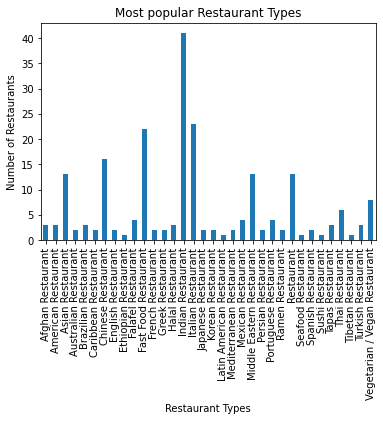

In [309]:
import matplotlib.pyplot as plt
import numpy as np
top_rests_types_plot_data = top_rests_types['Neighbourhood']

top_rests_types_plot_data.plot.bar()

plt.title('Most popular Restaurant Types')
plt.xlabel('Restaurant Types')
plt.ylabel('Number of Restaurants')

plt.show()


In [310]:
rests_per_code = manch_venues.groupby('Neighbourhood').count()
rests_per_code

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighbourhood,,,,,,
M11,1,1,1,1,1,1
M12,1,1,1,1,1,1
M13,9,9,9,9,9,9
M14,30,30,30,30,30,30
M15,7,7,7,7,7,7
M16,6,6,6,6,6,6
M18,2,2,2,2,2,2
M19,5,5,5,5,5,5
M2,28,28,28,28,28,28


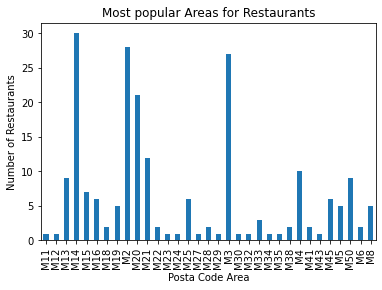

In [311]:
rests_per_code_plot_data = rests_per_code['Venue']

rests_per_code_plot_data.plot.bar()

plt.title('Most popular Areas for Restaurants')
plt.xlabel('Posta Code Area')
plt.ylabel('Number of Restaurants')

plt.show()


In [312]:
print('There are {} uniques categories.'.format(len(manch_venues['Venue Category'].unique())))

There are 34 uniques categories.


In [313]:
# one hot encoding
manch_onehot = pd.get_dummies(manch_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
manch_onehot['Neighbourhood'] = manch_venues['Neighbourhood'] 

# move neighborhood column to the first column
fixed_columns = [manch_onehot.columns[-1]] + list(manch_onehot.columns[:-1])
manch_onehot = manch_onehot[fixed_columns]

manch_onehot.head()

,Neighbourhood,Afghan Restaurant,American Restaurant,Asian Restaurant,Australian Restaurant,Brazilian Restaurant,Caribbean Restaurant,Chinese Restaurant,English Restaurant,Ethiopian Restaurant,...,Ramen Restaurant,Restaurant,Seafood Restaurant,Spanish Restaurant,Sushi Restaurant,Tapas Restaurant,Thai Restaurant,Tibetan Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant
7,M2,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,M2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
12,M2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15,M2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
21,M2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [314]:
manch_onehot.shape

(212, 35)

In [315]:
manch_grouped = manch_onehot.groupby('Neighbourhood').mean().reset_index()
manch_grouped

,Neighbourhood,Afghan Restaurant,American Restaurant,Asian Restaurant,Australian Restaurant,Brazilian Restaurant,Caribbean Restaurant,Chinese Restaurant,English Restaurant,Ethiopian Restaurant,...,Ramen Restaurant,Restaurant,Seafood Restaurant,Spanish Restaurant,Sushi Restaurant,Tapas Restaurant,Thai Restaurant,Tibetan Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant
0,M11,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,M12,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,M13,0.111111,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,M14,0.066667,0.000000,0.066667,0.000000,0.000000,0.000000,0.066667,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.033333,0.000000
4,M15,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.142857,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.142857
5,M16,0.000000,0.000000,0.166667,0.000000,0.000000,0.166667,0.333333,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,0.000000,0.000000
6,M18,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,M19,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,M2,0.000000,0.000000,0.107143,0.035714,0.035714,0.035714,0.000000,0.035714,0.035714,...,0.035714,0.107143,0.000000,0.000000,0.000000,0.035714,0.071429,0.000000,0.000000,0.071429
9,M20,0.000000,0.000000,0.047619,0.000000,0.000000,0.000000,0.047619,0.000000,0.000000,...,0.000000,0.095238,0.000000,0.000000,0.000000,0.000000,0.095238,0.000000,0.000000,0.047619


In [316]:
num_top_venues = 5

for hood in manch_grouped['Neighbourhood']:
    print("----"+hood+"----")
    temp = manch_grouped[manch_grouped['Neighbourhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----M11----
                       venue  freq
0       Fast Food Restaurant   1.0
1          Afghan Restaurant   0.0
2                 Restaurant   0.0
3         Mexican Restaurant   0.0
4  Middle Eastern Restaurant   0.0


----M12----
                       venue  freq
0         Chinese Restaurant   1.0
1          Afghan Restaurant   0.0
2         Seafood Restaurant   0.0
3         Mexican Restaurant   0.0
4  Middle Eastern Restaurant   0.0


----M13----
                       venue  freq
0         Chinese Restaurant  0.33
1       Fast Food Restaurant  0.22
2          Afghan Restaurant  0.11
3  Middle Eastern Restaurant  0.11
4          Indian Restaurant  0.11


----M14----
                       venue  freq
0  Middle Eastern Restaurant  0.27
1          Indian Restaurant  0.23
2          Afghan Restaurant  0.07
3         Chinese Restaurant  0.07
4           Halal Restaurant  0.07


----M15----
                       venue  freq
0          Korean Restaurant  0.14
1       Fast Food Rest

In [317]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [318]:
num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighbourhood'] = manch_grouped['Neighbourhood']

for ind in np.arange(manch_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(manch_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,M11,Fast Food Restaurant,Vegetarian / Vegan Restaurant,Ethiopian Restaurant,Indian Restaurant,Halal Restaurant
1,M12,Chinese Restaurant,Vegetarian / Vegan Restaurant,Ethiopian Restaurant,Indian Restaurant,Halal Restaurant
2,M13,Chinese Restaurant,Fast Food Restaurant,Afghan Restaurant,Korean Restaurant,Middle Eastern Restaurant
3,M14,Middle Eastern Restaurant,Indian Restaurant,Afghan Restaurant,Chinese Restaurant,Fast Food Restaurant
4,M15,Vegetarian / Vegan Restaurant,Restaurant,Fast Food Restaurant,Indian Restaurant,Korean Restaurant


<h2> Cluster Neighborhoods

In [319]:
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans


In [320]:
# set number of clusters
kclusters = 6

manch_grouped_clustering = manch_grouped.drop('Neighbourhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(manch_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([3, 1, 2, 2, 2, 2, 3, 5, 2, 2], dtype=int32)

In [321]:
# add clustering labels

neighborhoods_venues_sorted.insert(0,'Cluster Labels', kmeans.labels_)

df_manch_final2 = df_manch_final.rename(columns={"Postcode district":"Neighbourhood"})

manch_merged = df_manch_final2

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
manch_merged = manch_merged.join(neighborhoods_venues_sorted.set_index('Neighbourhood'), on='Neighbourhood')

manch_merged.head() # check the last columns!

,Neighbourhood,Coverage,Local authority area(s),Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,M1,"Piccadilly, City Centre, Market Street",Manchester,54.477481,-2.232058,NaN,NaN,NaN,NaN,NaN,NaN
1,M2,"Deansgate, City Centre",Manchester,53.480191,-2.243224,2.0,Indian Restaurant,Italian Restaurant,Asian Restaurant,Restaurant,Vegetarian / Vegan Restaurant
2,M3,"City Centre, Deansgate, Castlefield, Blackfria...",Salford,53.485342,-2.250999,2.0,Indian Restaurant,Italian Restaurant,Restaurant,Vegetarian / Vegan Restaurant,Asian Restaurant
3,M4,"Ancoats, Northern Quarter, Strangeways",Manchester,53.486204,-2.225420,2.0,Indian Restaurant,Vegetarian / Vegan Restaurant,Restaurant,Falafel Restaurant,Mexican Restaurant
4,M5,"Ordsall, Seedley, Weaste, University",Salford,53.476942,-2.273376,0.0,Fast Food Restaurant,American Restaurant,Mexican Restaurant,Chinese Restaurant,Vegetarian / Vegan Restaurant


In [322]:
manch_merged = manch_merged.dropna()
manch_merged


,Neighbourhood,Coverage,Local authority area(s),Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
1,M2,"Deansgate, City Centre",Manchester,53.480191,-2.243224,2.0,Indian Restaurant,Italian Restaurant,Asian Restaurant,Restaurant,Vegetarian / Vegan Restaurant
2,M3,"City Centre, Deansgate, Castlefield, Blackfria...",Salford,53.485342,-2.250999,2.0,Indian Restaurant,Italian Restaurant,Restaurant,Vegetarian / Vegan Restaurant,Asian Restaurant
3,M4,"Ancoats, Northern Quarter, Strangeways",Manchester,53.486204,-2.225420,2.0,Indian Restaurant,Vegetarian / Vegan Restaurant,Restaurant,Falafel Restaurant,Mexican Restaurant
4,M5,"Ordsall, Seedley, Weaste, University",Salford,53.476942,-2.273376,0.0,Fast Food Restaurant,American Restaurant,Mexican Restaurant,Chinese Restaurant,Vegetarian / Vegan Restaurant
5,M6,"Pendleton, Irlams o' th' Height, Langworthy, S...",Salford,53.495445,-2.313941,1.0,Restaurant,Chinese Restaurant,English Restaurant,Halal Restaurant,Greek Restaurant
7,M8,"Crumpsall, Cheetham Hill",Manchester,53.508057,-2.236951,0.0,Fast Food Restaurant,Halal Restaurant,Asian Restaurant,Middle Eastern Restaurant,Vegetarian / Vegan Restaurant
9,M11,"Clayton, Openshaw, Beswick",Manchester,53.480782,-2.183147,3.0,Fast Food Restaurant,Vegetarian / Vegan Restaurant,Ethiopian Restaurant,Indian Restaurant,Halal Restaurant
10,M12,"Ardwick, Longsight, Chorlton-on-Medlock",Manchester,53.467249,-2.199980,1.0,Chinese Restaurant,Vegetarian / Vegan Restaurant,Ethiopian Restaurant,Indian Restaurant,Halal Restaurant
11,M13,"Ardwick, Longsight, Chorlton-on-Medlock",Manchester,53.464887,-2.221416,2.0,Chinese Restaurant,Fast Food Restaurant,Afghan Restaurant,Korean Restaurant,Middle Eastern Restaurant
12,M14,"Fallowfield, Moss Side, Ladybarn, Rusholme, Vi...",Manchester,53.450144,-2.228147,2.0,Middle Eastern Restaurant,Indian Restaurant,Afghan Restaurant,Chinese Restaurant,Fast Food Restaurant


In [323]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(manch_merged['Latitude'], manch_merged['Longitude'], manch_merged['Neighbourhood'], manch_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
       fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [324]:
manch_merged.loc[manch_merged['Cluster Labels'] == 0, manch_merged.columns[[1] + list(range(5, manch_merged.shape[1]))]]

,Coverage,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
4,"Ordsall, Seedley, Weaste, University",0.0,Fast Food Restaurant,American Restaurant,Mexican Restaurant,Chinese Restaurant,Vegetarian / Vegan Restaurant
7,"Crumpsall, Cheetham Hill",0.0,Fast Food Restaurant,Halal Restaurant,Asian Restaurant,Middle Eastern Restaurant,Vegetarian / Vegan Restaurant


In [325]:
manch_merged.loc[manch_merged['Cluster Labels'] == 1, manch_merged.columns[[1] + list(range(5, manch_merged.shape[1]))]]

,Coverage,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
5,"Pendleton, Irlams o' th' Height, Langworthy, S...",1.0,Restaurant,Chinese Restaurant,English Restaurant,Halal Restaurant,Greek Restaurant
10,"Ardwick, Longsight, Chorlton-on-Medlock",1.0,Chinese Restaurant,Vegetarian / Vegan Restaurant,Ethiopian Restaurant,Indian Restaurant,Halal Restaurant
28,"Eccles, Monton, Peel Green, Winton, Patricroft...",1.0,Chinese Restaurant,Vegetarian / Vegan Restaurant,Ethiopian Restaurant,Indian Restaurant,Halal Restaurant
34,Little Hulton,1.0,Asian Restaurant,Chinese Restaurant,Vegetarian / Vegan Restaurant,Falafel Restaurant,Indian Restaurant


In [326]:
manch_merged.loc[manch_merged['Cluster Labels'] == 2, manch_merged.columns[[1] + list(range(5, manch_merged.shape[1]))]]

,Coverage,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
1,"Deansgate, City Centre",2.0,Indian Restaurant,Italian Restaurant,Asian Restaurant,Restaurant,Vegetarian / Vegan Restaurant
2,"City Centre, Deansgate, Castlefield, Blackfria...",2.0,Indian Restaurant,Italian Restaurant,Restaurant,Vegetarian / Vegan Restaurant,Asian Restaurant
3,"Ancoats, Northern Quarter, Strangeways",2.0,Indian Restaurant,Vegetarian / Vegan Restaurant,Restaurant,Falafel Restaurant,Mexican Restaurant
11,"Ardwick, Longsight, Chorlton-on-Medlock",2.0,Chinese Restaurant,Fast Food Restaurant,Afghan Restaurant,Korean Restaurant,Middle Eastern Restaurant
12,"Fallowfield, Moss Side, Ladybarn, Rusholme, Vi...",2.0,Middle Eastern Restaurant,Indian Restaurant,Afghan Restaurant,Chinese Restaurant,Fast Food Restaurant
13,"Hulme, Manchester Science Park, Old Trafford",2.0,Vegetarian / Vegan Restaurant,Restaurant,Fast Food Restaurant,Indian Restaurant,Korean Restaurant
14,"Firswood, Old Trafford, Whalley Range, Moss Side",2.0,Chinese Restaurant,Asian Restaurant,Caribbean Restaurant,Indian Restaurant,Tibetan Restaurant
18,"Didsbury, Withington",2.0,Italian Restaurant,Indian Restaurant,Restaurant,Thai Restaurant,Middle Eastern Restaurant
19,"Chorlton-cum-Hardy, Barlow Moor",2.0,Indian Restaurant,Turkish Restaurant,Restaurant,Spanish Restaurant,Falafel Restaurant
23,"Prestwich, Sedgley Park, Simister",2.0,Indian Restaurant,Latin American Restaurant,Middle Eastern Restaurant,Seafood Restaurant,Chinese Restaurant


In [327]:
manch_merged.loc[manch_merged['Cluster Labels'] == 3, manch_merged.columns[[1] + list(range(5, manch_merged.shape[1]))]]

,Coverage,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
9,"Clayton, Openshaw, Beswick",3.0,Fast Food Restaurant,Vegetarian / Vegan Restaurant,Ethiopian Restaurant,Indian Restaurant,Halal Restaurant
16,"Abbey Hey, Gorton",3.0,Fast Food Restaurant,Vegetarian / Vegan Restaurant,Ethiopian Restaurant,Indian Restaurant,Halal Restaurant
20,"Wythenshawe, Northenden, Sharston Industrial Area",3.0,Fast Food Restaurant,Vegetarian / Vegan Restaurant,Ethiopian Restaurant,Indian Restaurant,Halal Restaurant
21,"Baguley, Brooklands (Manchester and Trafford),...",3.0,Fast Food Restaurant,Vegetarian / Vegan Restaurant,Ethiopian Restaurant,Indian Restaurant,Halal Restaurant
22,"Middleton, Alkrington, Chadderton",3.0,Fast Food Restaurant,Vegetarian / Vegan Restaurant,Ethiopian Restaurant,Indian Restaurant,Halal Restaurant
30,Stretford,3.0,Fast Food Restaurant,Vegetarian / Vegan Restaurant,Ethiopian Restaurant,Indian Restaurant,Halal Restaurant
33,Failsworth,3.0,Fast Food Restaurant,Vegetarian / Vegan Restaurant,Ethiopian Restaurant,Indian Restaurant,Halal Restaurant


In [328]:
manch_merged.loc[manch_merged['Cluster Labels'] == 4, manch_merged.columns[[1] + list(range(5, manch_merged.shape[1]))]]

,Coverage,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
32,"Denton, Audenshaw",4.0,Italian Restaurant,Ethiopian Restaurant,Indian Restaurant,Halal Restaurant,Greek Restaurant
37,Droylsden,4.0,Italian Restaurant,Ethiopian Restaurant,Indian Restaurant,Halal Restaurant,Greek Restaurant


In [329]:
manch_merged.loc[manch_merged['Cluster Labels'] == 5, manch_merged.columns[[1] + list(range(5, manch_merged.shape[1]))]]

,Coverage,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
17,"Levenshulme, Burnage",5.0,Indian Restaurant,Fast Food Restaurant,Vegetarian / Vegan Restaurant,Ethiopian Restaurant,Halal Restaurant
25,"Swinton, Clifton, Pendlebury, Wardley, Agecroft",5.0,Indian Restaurant,Vegetarian / Vegan Restaurant,Ethiopian Restaurant,Halal Restaurant,Greek Restaurant
26,"Worsley, Walkden, Boothstown, Mosley Common, W...",5.0,Indian Restaurant,Fast Food Restaurant,Vegetarian / Vegan Restaurant,Ethiopian Restaurant,Halal Restaurant
27,"Tyldesley, Astley",5.0,Indian Restaurant,Vegetarian / Vegan Restaurant,Ethiopian Restaurant,Halal Restaurant,Greek Restaurant
36,"Urmston, Davyhulme, Flixton, Trafford Park",5.0,Indian Restaurant,Vegetarian / Vegan Restaurant,Ethiopian Restaurant,Halal Restaurant,Greek Restaurant
39,Whitefield,5.0,Indian Restaurant,Italian Restaurant,Ethiopian Restaurant,Halal Restaurant,Greek Restaurant
